### Import libraries

In [23]:
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt 
import seaborn as sns

### Load the dataset

In [2]:
df = pd.read_csv('spam.csv')
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


### Feature Engineering 

In [3]:
df['spam'] = df['Category'].apply(lambda x: 1 if x == 'spam' else 0)
df.head()

,Category,Message,spam
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


### Handle the imbalance data

In [5]:
df.Category.value_counts()

Category
ham     4825
spam     747
Name: count, dtype: int64

In [7]:
sample_no = 4825
df_ham = df[df['Category'] == 'ham']
df_spam = df[df['Category'] == 'spam']

df_spam_over = df_spam.sample(sample_no, replace=True)

In [9]:
# concat the 2 df2
df_balance = pd.concat([df_ham, df_spam_over], axis=0)
df_balance.Category.value_counts()

Category
ham     4825
spam    4825
Name: count, dtype: int64

### Train Test Split

In [10]:
X_train, X_test, y_train, y_test = train_test_split(df_balance.Message, df_balance.spam, test_size=0.2, random_state=42)

In [11]:
len(X_train)

7720

In [12]:
len(X_test)

1930

### Vectorizer

In [16]:
vectorizer = CountVectorizer()
X_train = vectorizer.fit_transform(X_train.values)
X_test = vectorizer.transform(X_test.values)

In [17]:
X_train

<7720x7917 sparse matrix of type '<class 'numpy.int64'>'
	with 130300 stored elements in Compressed Sparse Row format>

In [18]:
X_train.toarray()[:2]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

### Model

In [19]:
model = MultinomialNB()

# train the model
model.fit(X_train, y_train)

MultinomialNB()

In [20]:
# predictions 
y_preds = model.predict(X_test)

### Model Evaluation

In [21]:
accuracy = accuracy_score(y_test, y_preds)
accuracy

0.9860103626943005

In [22]:
# the classification report 
class_repo = classification_report(y_test, y_preds)
print(class_repo)

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       985
           1       0.99      0.98      0.99       945

    accuracy                           0.99      1930
   macro avg       0.99      0.99      0.99      1930
weighted avg       0.99      0.99      0.99      1930



In [24]:
# confunsion matrix 
cm = confusion_matrix(y_test, y_preds)
cm

array([[975,  10],
       [ 17, 928]], dtype=int64)

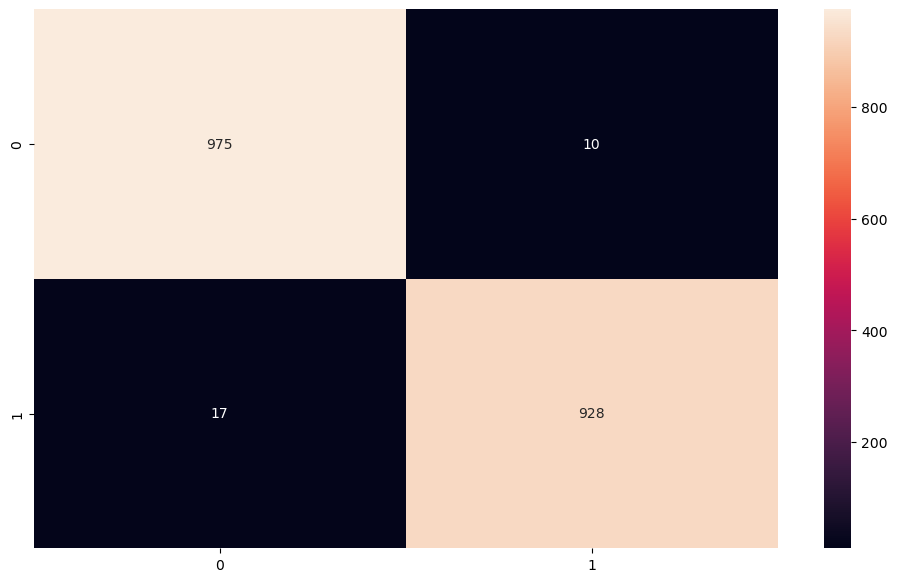

In [26]:
plt.figure(figsize=(12, 7))
sns.heatmap(cm, annot=True,fmt='d')
plt.show()

### Save the model

In [27]:
import pickle


In [32]:
with open('model.h5', 'wb') as file:
    mp = pickle.dump(model, file)